<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-01-tree-based-models-bagging-bagged-trees-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1. Bagging Decision Trees

Bagging Decision Trees, or Bootstrap Aggregating Decision Trees, is an ensemble machine learning technique that improves the stability and accuracy of decision trees by combining multiple trees trained on different subsets of the data. It reduces variance and helps prevent overfitting, which is a common issue with individual decision trees. Below, I’ll explain the concept, how it works, the important steps, and include relevant mathematical details.




## Overview

Bagging involves creating multiple decision trees by training each on a random subset of the training data, sampled with replacement (bootstrap sampling). The predictions from these trees are then aggregated, typically by majority voting for classification or averaging for regression, to produce a final prediction. This approach leverages the diversity of trees to improve robustness and generalization.

-   `Key Idea`: Each tree is trained on a slightly different dataset, making the trees less correlated. Combining their predictions reduces variance without significantly increasing bias.
-   `Purpose`: To address the high variance of single decision trees, which can overfit to noise in the data.

### Key Characteristics

1.  `Variance Reduction`:
    -   Decision trees have high variance (small changes in data can lead to different trees). Bagging reduces variance by averaging predictions, as shown in the variance formula above.
2.  `Parallelization`:
    -   Each tree is trained independently, making bagging computationally efficient with parallel processing.
3.  `No Bias Increase`:
    -   Since trees are unpruned, they have low bias. Bagging maintains this low bias while reducing variance.
4.  `Out-of-Bag (OOB) Error Estimation`:
    -   Data points not included in a bootstrap sample (about 36.8% of the data) can be used to estimate the model’s performance without a separate validation set.
    -   OOB error for a data point ( (x_i, y_i) ) is computed by averaging predictions from trees where ( (x_i, y_i) ) was not in the bootstrap sample.

### How Bagging Decision Trees Works

Bagging Decision Trees consists of three main steps:

1. Bootstrap Sampling

-   Randomly sample subsets of the training data with replacement.

-   Each subset (or "bootstrap sample") is used to train a separate decision tree.

-   Generate $B$ bootstrap samples $D_1, D_2, \dots, D_B$), where each $D_b$ is created by sampling $N$ data points from $D$ with replacement. \`

-   For a dataset $D$, the probability that a specific data point $(x_i, y_i)$ is included in a bootstrap sample is:

$$ P(\text{included}) = 1 - \left(1 - \frac{1}{N}\right)^N \approx 1 - e^{-1} \approx 0.632 $$

-   Each $D_b$ is a multiset of size $N$, drawn from $D$.

2. Training Individual Trees

-   Build a decision tree on each bootstrap sample without pruning (allowing trees to grow deep).

-   Each tree is trained independently, capturing different aspects of the data.

-   For `classification`, train a decision tree $T_b$ on each bootstrap sample $D_b$, for $b = 1, 2, \dots, B$.

-   At each node, a decision tree selects the feature and threshold that minimize an impurity measure, e.g., `Gini impurity`: \`

$$ \text{Gini}(D) = 1 - \sum_{k=1}^K p_k^2 $$ where $p_k$ is the proportion of class $k$ in the node, and $K$ is the number of classes.

-   The split that minimizes the weighted average impurity across child nodes is chosen:

$$ \text{Gini}_{\text{split}} = \sum_{m=1}^M \frac{N_m}{N} \text{Gini}(D_m) $$ where $N_m$ is the number of samples in child node $m$, and $M$ is the number of child nodes (usually 2 for binary splits).

-   For `regression`, \` - The tree minimizes the mean squared error (MSE) in each node:

$$ \text{MSE}(D) = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2 $$ where $\bar{y}$ is the mean target value in the node.

-   Splits minimize the weighted average MSE across child nodes.

3. Aggregation

-   For `classification`: Combine predictions from all trees using majority voting.

-   For **regression**: Average the predictions from all trees.

-   Combine predictions from all $B$) trees to produce the final output.

-   For `classification`, each tree $T_b$) predicts a class $\hat{y}_b(x)$ for input $x$.

-   The final prediction is the majority vote:

$$ \hat{y}(x) = \text{mode} \left( \hat{y}_1(x), \hat{y}_2(x), \dots, \hat{y}_B(x) \right) $$

-   Alternatively, compute class probabilities by averaging the proportion of votes for each class:

$$ P(\text{class } k | x) = \frac{1}{B} \sum_{b=1}^B I(\hat{y}_b(x) = k) $$

where $I$ is the indicator function.

-   For regression:

    -   Each tree $T_b$ predicts a continuous value $\hat{y}_b(x)$.
    -   The final prediction is the average:

$$ \hat{y}(x) = \frac{1}{B} \sum_{b=1}^B \hat{y}_b(x) $$

-   Bagging reduces variance by averaging predictions. Suppose the variance of a single tree’s prediction is $\text{Var}(\hat{y}_b(x)) = \sigma^2$, and the correlation between trees is $\rho$.
-   The variance of the bagged prediction (for regression) is:

$$ \text{Var}(\hat{y}(x)) = \rho \sigma^2 + \frac{1 - \rho}{B} \sigma^2 $$

-   As $B \to \infty$, the second term vanishes, and the variance approaches $\rho \sigma^2$.
-   Since $rho < 1$ (trees are less correlated due to bootstrap sampling), bagging reduces variance compared to a single tree.

4. Prediction

-   Use the aggregated prediction as the final output for new, unseen data.
-   For a new input $x$, pass it through all $B$ trees and compute the aggregated prediction (majority vote for classification, average for regression).
-   The final model is robust because it averages out errors and noise captured by individual trees.


Here below is a flowchart illustrating the Bagging Decision Trees workflow:


![alt text](http://drive.google.com/uc?export=view&id=1BVwNxUCoPlvVOsxdUJ3YZIZQ1VcovfN8)





### Limitations

1.  `Computational Cost`: Training $B$ trees requires more computation than a single tree.
2.  `Interpretability`: A bagged model is less interpretable than a single decision tree.
3.  `Correlation Between Trees`: If bootstrap samples are too similar (e.g., due to a small dataset), trees may be correlated, reducing the effectiveness of variance reduction.


## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314981 sha256=2c18a03c37784022f418b962f73e5561299f885bed087c1fe22f4fbcc270a225
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bagging Decision Trees in R from Scratch

Performing Bagging Decision Trees in R without external packages requires implementing the algorithm from scratch using base R functions. Below, I’ll provide a detailed explanation and R code to perform bagging for classification on the Iris dataset and regression on the Boston Housing dataset. Since we’re avoiding packages, we’ll use base R’s rpart functionality implicitly through manual tree-building logic, but we’ll construct the bagging process (bootstrap sampling, tree training, and aggregation) manually.


### Bootstrap Sampling: Generate random subsets of the data with replacement.

In [3]:
%%R
# Set seed for reproducibility
set.seed(123)

# Bootstrap sampling function
bootstrap_sample <- function(X, y) {
  n <- nrow(X)
  idx <- sample(1:n, size = n, replace = TRUE)
  return(list(X = X[idx, ], y = y[idx]))
}

### Decision Tree Split Function

Build simple decision trees on each bootstrap sample using a custom implementation. Find the best feature and threshold for splitting.

The `simple_split()` R function finds the best feature and threshold to split data in a decision tree for classification or regression:

- Feature matrix `X`, target `y`, task type ("classification" or "regression").
-Classification: Maximizes information gain (reduces entropy).
- Regression: Minimizes weighted child node variance.
- Iterates over features and thresholds, evaluates splits, and skips invalid ones (<2 samples per side).

In [4]:
%%R
# Decision tree split function (handles classification and regression)
simple_split <- function(X, y, task = "classification") {
  n <- nrow(X)
  best_score <- ifelse(task == "classification", 0, Inf)
  best_feature <- NULL
  best_threshold <- NULL

  if (task == "classification") {
    # Parent entropy for classification
    parent_score <- -sum(table(y) / n * log2(table(y) / n + 1e-10))
  } else {
    # Parent variance for regression
    parent_score <- var(y)
  }

  # Try each feature and threshold
  for (feature in 1:ncol(X)) {
    values <- sort(unique(X[, feature]))
    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (threshold in thresholds) {
      left_idx <- X[, feature] <= threshold
      right_idx <- !left_idx

      if (sum(left_idx) < 2 || sum(right_idx) < 2) next

      if (task == "classification") {
        # Entropy for classification
        left_y <- y[left_idx]
        right_y <- y[right_idx]
        left_entropy <- -sum(table(left_y) / sum(left_idx) * log2(table(left_y) / sum(left_idx) + 1e-10))
        right_entropy <- -sum(table(right_y) / sum(right_idx) * log2(table(right_y) / sum(right_idx) + 1e-10))
        score <- parent_score - (sum(left_idx) / n * left_entropy + sum(right_idx) / n * right_entropy)
      } else {
        # Variance for regression
        left_y <- y[left_idx]
        right_y <- y[right_idx]
        score <- var(left_y) * sum(left_idx) / n + var(right_y) * sum(right_idx) / n
      }

      # Update best split
      if ((task == "classification" && score > best_score) ||
          (task == "regression" && score < best_score)) {
        best_score <- score
        best_feature <- feature
        best_threshold <- threshold
      }
    }
  }

  return(list(feature = best_feature, threshold = best_threshold))
}

### Aggregation: Combine predictions via majority voting (classification) or averaging (regression).

- `predict_tree()`: Predicts using a single tree. Returns leaf `value` if no split; else assigns `left_value` or `right_value` based on `feature` and `threshold`.
- `bagging_train()`: Trains `B` trees on bootstrap samples. Each tree stores split (`feature`, `threshold`, `left_value`, `right_value`) or leaf `value` (majority class or mean).
- `bagging_predict()`: Predicts with all trees. Aggregates by majority voting (classification) or averaging (regression).
- `evaluate_model()`**: Computes accuracy (classification) or MSE (regression), prints, and returns metric.
- `run_bagging()`: Runs bagging: trains `B` trees, predicts on training data, evaluates performance.


In [5]:
%%R
# Predict with a single tree
predict_tree <- function(X, tree, task = "classification") {
  if (is.null(tree$feature)) return(tree$value)
  feature <- tree$feature
  threshold <- tree$threshold
  predictions <- rep(NA, nrow(X))

  for (i in 1:nrow(X)) {
    if (X[i, feature] <= threshold) {
      predictions[i] <- tree$left_value
    } else {
      predictions[i] <- tree$right_value
    }
  }
  return(predictions)
}

# Bagging training function
bagging_train <- function(X, y, B = 10, task = "classification") {
  n <- nrow(X)
  trees <- list()

  for (b in 1:B) {
    # Bootstrap sample
    sample_data <- bootstrap_sample(X, y)
    X_b <- sample_data$X
    y_b <- sample_data$y

    # Find best split
    split <- simple_split(X_b, y_b, task)

    if (is.null(split$feature)) {
      # No valid split: use majority class (classification) or mean (regression)
      trees[[b]] <- list(value = ifelse(task == "classification",
                                       names(sort(table(y_b), decreasing = TRUE))[1],
                                       mean(y_b)))
    } else {
      # Create left and right nodes
      left_idx <- X_b[, split$feature] <= split$threshold
      right_idx <- !left_idx
      left_value <- ifelse(task == "classification",
                          names(sort(table(y_b[left_idx]), decreasing = TRUE))[1],
                          mean(y_b[left_idx]))
      right_value <- ifelse(task == "classification",
                           names(sort(table(y_b[right_idx]), decreasing = TRUE))[1],
                           mean(y_b[right_idx]))

      trees[[b]] <- list(
        feature = split$feature,
        threshold = split$threshold,
        left_value = left_value,
        right_value = right_value
      )
    }
  }

  return(trees)
}

# Bagging prediction function
bagging_predict <- function(X, trees, task = "classification") {
  n <- nrow(X)
  predictions <- matrix(NA, nrow = n, ncol = length(trees))

  # Get predictions from each tree
  for (b in 1:length(trees)) {
    predictions[, b] <- predict_tree(X, trees[[b]], task)
  }

  # Aggregate predictions
  if (task == "classification") {
    # Majority voting
    final_predictions <- apply(predictions, 1, function(row) {
      names(sort(table(row), decreasing = TRUE))[1]
    })
  } else {
    # Average for regression
    final_predictions <- rowMeans(predictions)
  }

  return(final_predictions)
}

# Evaluate function
evaluate_model <- function(y_true, y_pred, task = "classification") {
  if (task == "classification") {
    accuracy <- mean(y_true == y_pred)
    cat("Accuracy:", accuracy, "\n")
    return(accuracy)
  } else {
    mse <- mean((y_true - y_pred)^2)
    cat("Mean Squared Error:", mse, "\n")
    return(mse)
  }
}

# Main function to run bagging
run_bagging <- function(X, y, dataset_name, B = 10, task = "classification") {
  cat("Running Bagging on", dataset_name, "\n")

  # Train model
  trees <- bagging_train(X, y, B, task)

  # Predict on training data (for simplicity)
  predictions <- bagging_predict(X, trees, task)

  # Evaluate
  evaluate_model(y, predictions, task)
}

### Example Usage- Classification

In [6]:
%%R
# Load and prepare Iris data for classification
data(iris)
X_iris <- iris[, 1:4]
y_iris <- iris[, 5]
# Run bagging
run_bagging(X_iris, y_iris, "Iris", B = 10, task = "classification")

Running Bagging on Iris 
Accuracy: 0.6666667 
[1] 0.6666667


### Example Usage- Regression



In [7]:
%%R
# Load and prepare Boston Housing data
data(Boston, package = "MASS")
X_boston <- Boston[, 1:13]
y_boston <- Boston[, 14]
# Run bagging
run_bagging(X_boston, y_boston, "Boston Housing", B = 10, task = "regression")

Running Bagging on Boston Housing 
Mean Squared Error: 36.37643 
[1] 36.37643


## Bagging Decision Trees in R with {ipred} package

This section demonstrates how to implement Bagging Decision Trees in R using the {ipred} package (Improved Predictors), which provides a convenient way to perform bagging for classification and regression tasks. The {ipred} package simplifies the process of building bagged decision trees and provides built-in functions for training and prediction.

Below are key functions, based on their importance and usage:

- `bagging()`: Builds bagged classification, regression, or survival trees using `rpart`. It supports bootstrap aggregation with options for out-of-bag error estimation (`coob=TRUE`) and double-bagging with additional predictors (e.g., LDA).

- `predict.bagging()`: Generates predictions from a bagging model for new data, aggregating results across trees.

- `inclass()`: Performs indirect classification by modeling intermediate variables to predict the response, useful for complex relationships.

- `inbagg()`: Combines indirect classification with bagging, enhancing prediction by aggregating trees built on intermediate variables.

- `errorest()`: Estimates prediction error using resampling methods like cross-validation or bootstrap (e.g., ".632+ estimator").

- `ipredknn()`: Implements k-nearest neighbor classification compatible with formula-based modeling.

- `predict.ipredknn()`: Predicts class or probabilities for new data using a fitted k-NN model.

- `cv()`: Performs cross-validated error estimation for various models.

- `bootest()`: Computes bootstrap-based error rate estimates for different response types (factor, numeric, survival).

- `control.errorest`: Customizes settings for error estimation in resampling methods.

- `kfoldcv()`: Generates subsamples for k-fold cross-validation.

- `mypredict.lm()`, `mypredict.rpart()`, `mypredict.lda()`: Helper functions for predictions from linear models, decision trees, and LDA, respectively, used in pipelines or custom workflows.



### Check amd Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [8]:
%%R
packages <- c('tidyverse',
              'plyr',
              'rpart',
              'rpart.plot',
              'partykit',
              'mlbench',
              'ggparty',
              'ipred'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

#### Verify Installation

In [9]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      rpart rpart.plot   partykit    mlbench    ggparty 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
     ipred 
      TRUE 


### Load R Packages

In [10]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))



#### Check Loaded Packages

In [11]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:ipred"      "package:ggparty"    "package:mlbench"   
 [4] "package:partykit"   "package:mvtnorm"    "package:libcoin"   
 [7] "package:grid"       "package:rpart.plot" "package:rpart"     
[10] "package:plyr"       "package:lubridate"  "package:forcats"   
[13] "package:stringr"    "package:dplyr"      "package:purrr"     
[16] "package:readr"      "package:tidyr"      "package:tibble"    
[19] "package:ggplot2"    "package:tidyverse"  "package:tools"     
[22] "package:stats"      "package:graphics"   "package:grDevices" 
[25] "package:utils"      "package:datasets"   "package:methods"   
[28] "package:base"      


### Classifiaction Probelem

In this section, we will implement a Bagged Tree model for classification using the {ipred} package in R.

#### Data

We will `iris` dataset for this example. The `iris` dataset is a classic dataset in machine learning and statistics, containing measurements of various features of iris flowers. It has three classes of iris species: Setosa, Versicolor, and Virginica.


In [12]:
%%R
# Load and prepare Iris data
data(iris)
iris$Species <- as.factor(iris$Species)
set.seed(123)
# Split the data into training and testing sets
train_idx <- sample(1:nrow(iris), 0.7 * nrow(iris))
train_data <- iris[train_idx, ]
test_data <- iris[-train_idx, ]

####  Fit Bagged Tree Model

The `bagging()` function in the {ipred} package is used to implement Bagging (Bootstrap Aggregating) for classification or regression tasks. It builds an ensemble of decision trees by training each tree on a bootstrap sample of the data and aggregating their predictions. Below, I outline the main components of the `bagging()` function, focusing on its key arguments, internal mechanics, and outputs, based on its implementation in the {ipred} package.


The `bagging()` function in R’s {ipred} package builds a bagged decision tree ensemble. Its main components are:

   - `formula`: Model specification (e.g., `y ~ .`).
   - `data`: Training dataset.
   - `nbagg`: Number of trees (default: 25).
   - `coob`: Logical for out-of-bag (OOB) error (default: FALSE).
   - `control`: `rpart` parameters (e.g., `cp`, `minsplit`).
   - `ns`: Bootstrap sample size (default: nrow(data)).
   - `keepX`: Keep predictors in output (default: TRUE).


In [13]:
%%R
bagged_model <- bagging(Species ~ .,
                        data = train_data,
                        method = "class",
                        nbagg= 100,
                        coob = TRUE,
                        control = rpart.control(minsplit = 5, cp = 0.01))

#view results
bagged_model


Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = Species ~ ., data = train_data, 
    method = "class", nbagg = 100, coob = TRUE, control = rpart.control(minsplit = 5, 
        cp = 0.01))

Out-of-bag estimate of misclassification error:  0.0476 



#### Pruning

Bagging typically does not involve post-pruning individual trees, as the aggregation of many trees reduces overfitting. However, the `rpart.control(0`) parameters (e.g., `cp`) in the `bagging()` call control tree complexity during fitting. To inspect or adjust pruning for an individual tree, you can extract a tree from the ensemble

In [14]:
%%R
# Extract the first tree from the bagging ensemble
single_tree <- bagged_model$mtrees[[1]]$btree

# Check the complexity parameter table for pruning
printcp(single_tree)

# Prune the tree (optional, based on cp value with lowest xerror)
opt_cp <- single_tree$cptable[which.min(single_tree$cptable[, "xerror"]), "CP"]
pruned_tree <- prune(single_tree, cp = opt_cp)

# View pruned tree summary
summary(pruned_tree)


Classification tree:
rpart(formula = y ~ ., data = list(c(1, 2, 1, 1, 1, 1, 2, 2, 
1, 2, 3, 3, 3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 
2, 3, 3, 1, 1, 3, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 1, 
2, 3, 3, 3, 2, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 
3, 2, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 3, 1, 3, 3, 1, 3, 2, 
3, 3, 2, 1, 1, 2, 2, 2, 3, 3, 1, 1, 3), c(5.4, 6.1, 4.6, 4.4, 
5, 5.5, 5.5, 6, 4.4, 6.2, 5.6, 6.5, 6, 5.2, 4.9, 5.5, 6.3, 4.9, 
5.7, 6.5, 6.9, 5.8, 7.2, 6.4, 4.4, 6.7, 4.8, 5.9, 7.7, 5.5, 6.8, 
5.8, 5.5, 4.8, 6.3, 6.4, 5.2, 6.5, 6.4, 7.9, 5.1, 6.9, 5.5, 4.8, 
5.4, 4.8, 6.3, 5.8, 6.3, 4.8, 6.4, 5.6, 6.7, 4.9, 5.5, 4.8, 5, 
4.8, 5, 6.1, 6.7, 4.8, 4.6, 6.7, 5, 4.9, 4.8, 5.1, 6.1, 6.4, 
7.9, 5.8, 5.6, 6.3, 7.7, 5.5, 5.7, 5, 5, 6.9, 7, 4.6, 6.3, 6.9, 
6.4, 7.6, 4.6, 5.8, 7.9, 5.5, 6, 5.2, 6, 6.4, 5.7, 5.4, 5.4, 
6, 6.2, 5.4, 4.9, 7.2, 5.5, 4.9, 7.2), c(3.9, 2.9, 3.6, 2.9, 
3.5, 3.5, 2.5, 3.4, 2.9, 2.2, 2.8, 3, 3, 2.7, 2.5, 2.4, 2.8, 
3.6, 4.4, 3, 3.2, 2.8, 

#### Visualize the Pruned Tree

The `bagging` object contains multiple trees, but {ipred} does not provide a direct way to visualize the entire ensemble. You can plot an individual tree using `rpart.plot`.

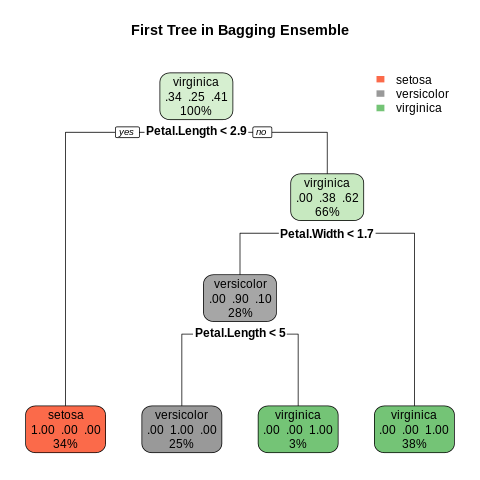

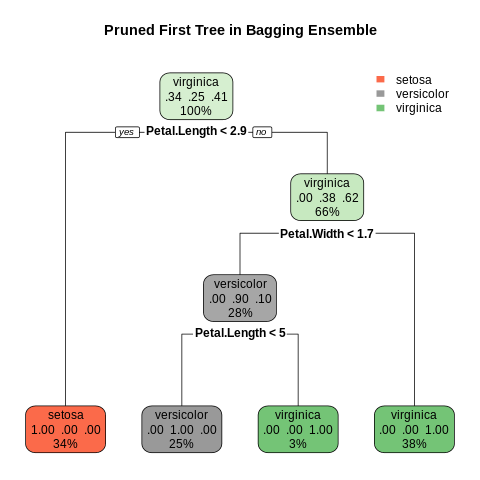

In [15]:
%%R
# Plot the first tree (unpruned or pruned)
rpart.plot(single_tree, main = "First Tree in Bagging Ensemble")
# Or plot the pruned tree
rpart.plot(pruned_tree, main = "Pruned First Tree in Bagging Ensemble")

#### Prediction and Evaluation

In [16]:
%%R -w 500 -h 450 -u px
# Predict on test data
predictions <- predict(bagged_model, newdata = test_data, type = "class")

# Create confusion matrix to evaluate performance
conf_matrix <- table(Predicted = predictions, Actual = test_data$Species)
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Test Accuracy:", round(accuracy, 3), "\n")

            Actual
Predicted    setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         0
  virginica       0          1        13
Test Accuracy: 0.978 


In [17]:
%%R
# Confusion matrix, proportion of cases
confusion_matrix <- table(test_data$Species, predictions)
confusion_matrix

            predictions
             setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         1
  virginica       0          0        13


In [18]:
%%R
# define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.6888889 
Precision: 1 
Recall: 1 
Specificity: 1 
F1 Score: 1 


#### Cross-Validation

The `errorest()` function in the {ipred} package performs cross-validation or bootstrap resampling to estimate the prediction error of a model. It can be used with the `bagging()` function to evaluate the performance of the bagged decision tree model.


In [19]:
%%R
# Perform 10-fold cross-validation
cv_error <- errorest(Species ~ ., data = iris, model = bagging,
                     predictor = predict,
                     nbagg = 25, control = rpart.control(cp = 0.01))
cat("10-fold CV Error Rate:", cv_error$error, "\n")

10-fold CV Error Rate: 0.04666667 


#### Variable Importance

The ipred package doesn't directly provide variable importance for bagged models, but we can compute it by aggregating the importance from individual trees (e.g., using rpart's variable importance). Below is an R script that calculates variable importance, averaging the importance scores across all trees in the bagged model, and creates a bar plot using ggplot2.

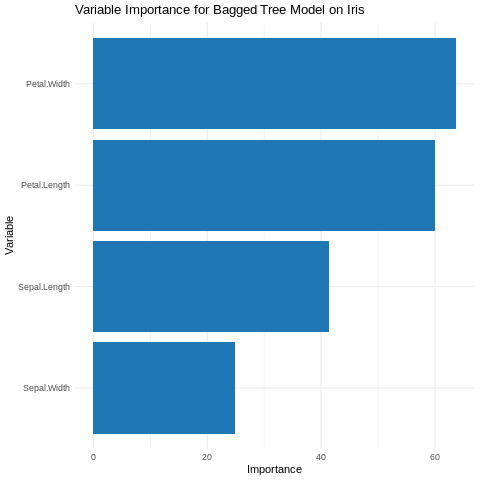

In [20]:
%%R
# Calculate variable importance
var_imp <- lapply(bagged_model$mtrees, function(tree) {
  imp <- tree$btree$variable.importance
  if (is.null(imp)) rep(0, ncol(iris) - 1) else imp
})
var_imp_matrix <- do.call(rbind, var_imp)
var_imp_mean <- colMeans(var_imp_matrix, na.rm = TRUE)
var_imp_df <- data.frame(
  Variable = names(var_imp_mean),
  Importance = var_imp_mean
) %>% arrange(desc(Importance))

# Plot variable importance with ggplot2
ggplot(var_imp_df, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "Variable Importance for Bagged Tree Model on Iris",
       x = "Variable", y = "Importance") +
  theme_minimal()

### Regression Problem

In this section, we will implement a Decision Tree model for regression using the {ipred} package in R.

#### Data

We will use the `BostonHousing` dataset from the {mlbench} package. The dataset contains various features related to housing in Boston and their corresponding median house values. The goal is to predict the median house value based on the features.

In [21]:
%%R
 # Load and prepare Boston Housing data
data(BostonHousing)
# Select subset of predictors and response
set.seed(123)
train_idx <- sample(1:nrow(BostonHousing), 0.7 * nrow(BostonHousing))
train_data <- BostonHousing[train_idx, ]
test_data <- BostonHousing[-train_idx, ]

#### Fit Bagged Tree Model



In [22]:
%%R
# Fit bagging model
set.seed(123)  # For reproducibility
bagged_model <- bagging(
  formula = medv ~ .,  # Predict medv using all predictors
  data = train_data,
  nbagg = 100,  # Number of bootstrap samples (trees)
  coob = TRUE,  # Compute out-of-bag error (MSE)
  control = rpart.control(minsplit = 5, cp = 0.01)  # Control parameters for rpart
)

# Summary of the model
print(bagged_model)


Bagging regression trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = medv ~ ., data = train_data, nbagg = 100, 
    coob = TRUE, control = rpart.control(minsplit = 5, cp = 0.01))

Out-of-bag estimate of root mean squared error:  3.8207 



#### Prune Tree

In [23]:
%%R
# Extract the first tree
single_tree <- bagged_model$mtrees[[1]]$btree

# Check complexity parameter table
# printcp(single_tree)

# Prune the tree (optional, based on cp with lowest xerror)
opt_cp <- single_tree$cptable[which.min(single_tree$cptable[, "xerror"]), "CP"]
pruned_tree <- prune(single_tree, cp = opt_cp)

#### Plot tree

We can use rpart.plot() function to plot the regression tree:

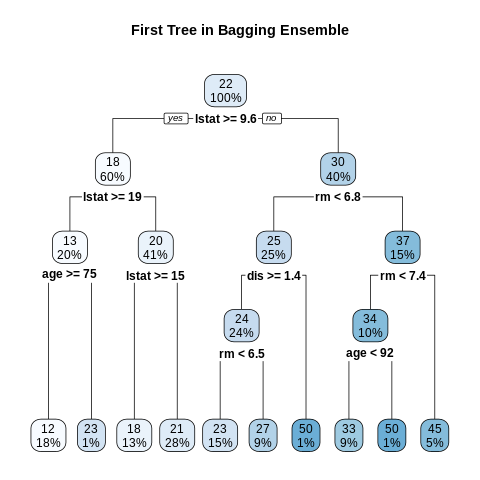

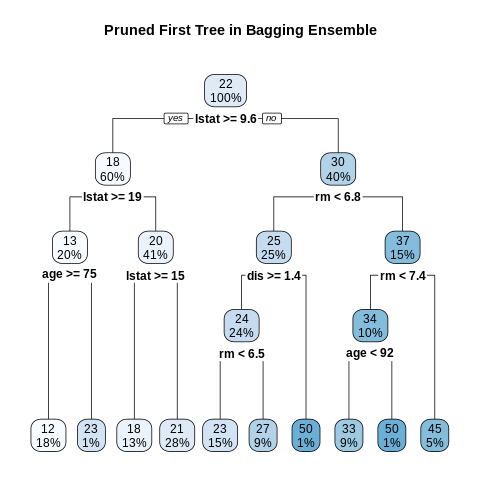

In [24]:
%%R
# Plot the first tree (unpruned or pruned)
rpart.plot(single_tree, main = "First Tree in Bagging Ensemble")
# Or plot the pruned tree
rpart.plot(pruned_tree, main = "Pruned First Tree in Bagging Ensemble")

#### Prediction and Evaluation

Test MSE: 17.837 
Test R-squared: 0.799 


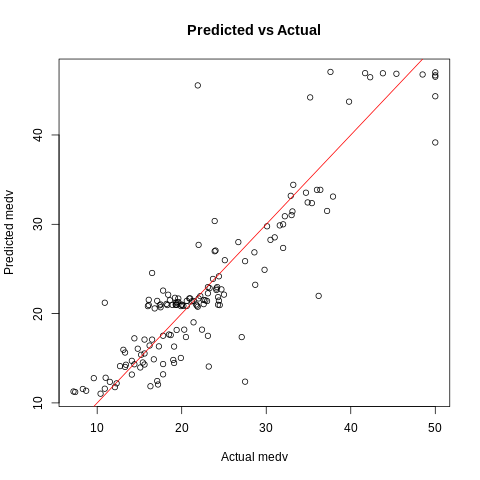

In [25]:
%%R
# Predict on test data
predictions <- predict(bagged_model, newdata = test_data)

# Calculate mean squared error (MSE)
mse <- mean((predictions - test_data$medv)^2)
cat("Test MSE:", round(mse, 3), "\n")

# Calculate R-squared
sst <- sum((test_data$medv - mean(test_data$medv))^2)
sse <- sum((predictions - test_data$medv)^2)
rsq <- 1 - sse / sst
cat("Test R-squared:", round(rsq, 3), "\n")

# Optional: Plot predicted vs actual values
plot(test_data$medv, predictions, main = "Predicted vs Actual",
     xlab = "Actual medv", ylab = "Predicted medv")
abline(0, 1, col = "red")

#### Cross-validation

In [27]:
%%R
# Perform 10-fold cross-validation
cv_error <- errorest(medv~ ., data = BostonHousing, model = bagging,
                     predictor = predict,
                     nbagg = 25, control = rpart.control(cp = 0.01))
cat("10-fold CV Error Rate:", cv_error$error, "\n")

10-fold CV Error Rate: 4.140537 


#### Variable Importance



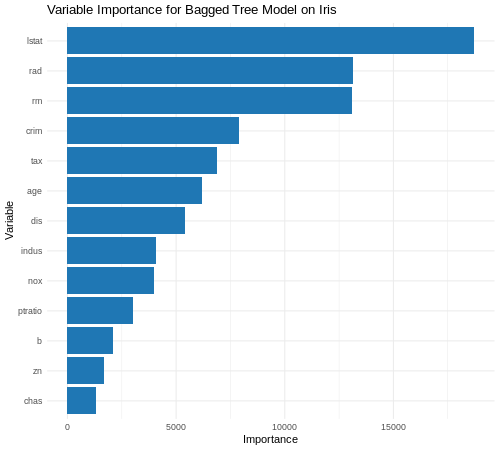

In [26]:
%%R -w 500 -h 450 -u px
# Calculate variable importance
var_imp <- lapply(bagged_model$mtrees, function(tree) {
  imp <- tree$btree$variable.importance
  if (is.null(imp)) rep(0, ncol(iris) - 1) else imp
})
var_imp_matrix <- do.call(rbind, var_imp)
var_imp_mean <- colMeans(var_imp_matrix, na.rm = TRUE)
var_imp_df <- data.frame(
  Variable = names(var_imp_mean),
  Importance = var_imp_mean
) %>% arrange(desc(Importance))

# Plot variable importance with ggplot2
ggplot(var_imp_df, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "Variable Importance for Bagged Tree Model on Iris",
       x = "Variable", y = "Importance") +
  theme_minimal()

## Summary and Conclusion

## Summary and Conclusion

Bagging Decision Trees is a powerful ensemble method that mitigates the high variance of individual decision trees by training multiple trees on bootstrap samples and aggregating their predictions. The key steps—bootstrap sampling, training unpruned trees, and aggregating predictions—are grounded in statistical principles that reduce variance while maintaining low bias. The mathematical framework, including Gini impurity for classification, MSE for regression, and variance reduction formulas, highlights why bagging is effective. This approach is a foundation for more advanced ensemble methods like Random Forests, which further reduce tree correlation by randomizing feature selection. This notebook provides a comprehensive understanding of Bagging Decision Trees, from theoretical concepts to practical implementation in R, making it a valuable resource for practitioners and researchers in machine learning.


## References


1.  Breiman, L. (1996). "Bagging Predictors." Machine Learning, 24(2), 123-140.

2.  Breiman, L. (1998). "Arcing Classifiers." The Annals of Statistics, 26(3), 801-849.

3.  Dietterich, T. G. (2000). "An Experimental Comparison of Three Methods for Constructing Ensembles of Decision Trees: Bagging, Boosting, and Randomization." Machine Learning, 40(2), 139-157.

4.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). "The Elements of Statistical Learning: Data Mining, Inference, and Prediction" (2nd Edition). Springer.

5.  Kuhn, M., & Johnson, K. (2013). "Applied Predictive Modeling." Springer.

6.  James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An Introduction to Statistical Learning: With Applications in R" (1st Edition). Springer.

7.  StatQuest by Josh Starmer: "Bagging (Bootstrap Aggregating) Clearly Explained" (YouTube, https://www.youtube.com/watch?v=sS5HyqaoAZQ)

8.  Towards Data Science: "Understanding Bagging and Random Forest" (https://towardsdatascience.com/understanding-bagging-and-random-forest-3e8f6e3e841b)

9.  Coursera: "Machine Learning by Andrew Ng" (https://www.coursera.org/learn/machine-learning)
